## The Sparks Foundation
####  Graduate Rotational Internship Program 
##### <i>TASK-3:<i>  <u>‘Exploratory Data Analysis’ on Retail dataset ‘SampleSuperstore’</u>

### <b>Author : Vishal Jaiswal</b>

#### <u>OBJECTIVE:</u>
   ##### 1. To Analyse Retail dataset and find out the weak areas where this store should work to make more profit.
   ##### 2. To find the business problem by doing Exploratory Data Analysis

###   <u> Importing Required Libraries</u>

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  <u> Loading Sample Superstore Dataset</u>

In [42]:
store_data= pd.read_csv("SampleSuperstore.csv")
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### <u>Data Wrangling</u>

In [43]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


<b>The dataset contains integer, float and object datatype. And it's Dimmension = (9994, 13) </b>

#### <u>Finding and Removing Duplicate Values</u>

In [44]:
d1=store_data.duplicated().sum()
store_data.drop_duplicates(subset=None, keep='first', inplace=True)
d2=store_data.duplicated().sum()

print(f"Duplicates before processing = {d1}")
print(f"Duplicates after processing = {d2}")

Duplicates before processing = 17
Duplicates after processing = 0


#### <u>Removing Unwanted Columns</u>
<b>Because Country, City and Postal Code Column are not going to affect profit and is independent of sales.</b>

In [45]:
store_data.drop(['Country','City', 'Postal Code'], axis=1, inplace=True)

In [46]:
store_data.head()

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### <u>Finding missing data</u>

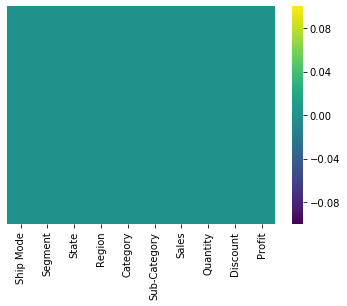

In [47]:
sns.heatmap(store_data.isnull(),yticklabels=False, cmap='viridis')

<b> No Missing Data Found </b>

### <u>Exploratory Data Analysis</u>

##### Counts of observations in each Categorical Column:

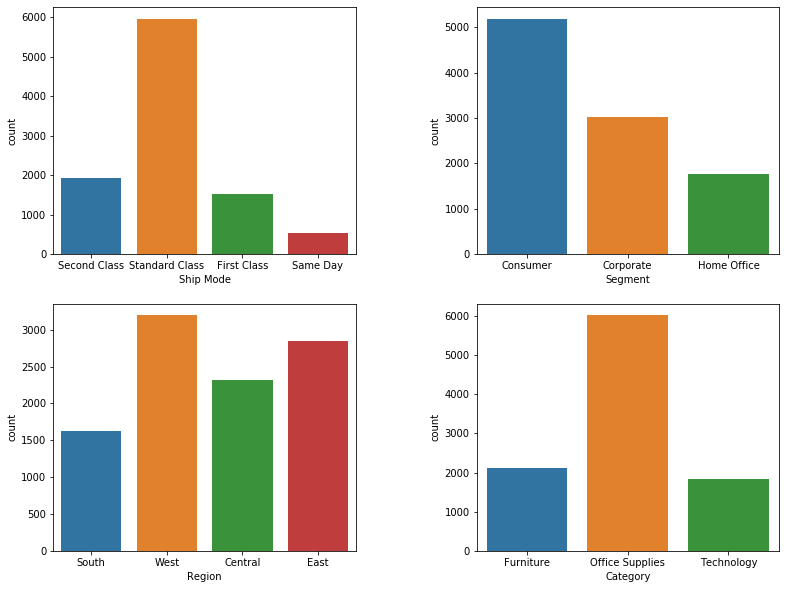

In [48]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
fig.subplots_adjust(wspace=0.4)
sns.countplot(store_data['Ship Mode'], ax=axis[0][0])
sns.countplot(store_data['Segment'] , ax=axis[0][1])
sns.countplot(store_data['Region'] , ax=axis[1][0])
sns.countplot(store_data['Category'] , ax=axis[1][1])

<b><ol>
    <li>Approx. 6000 shipping is done in standard class, which is maximum as compare to other mode of shipping.</li><br>
    <li>Customer of this store mainly from Consumer segment, & minimum from Home office.</li><br>
    <li>This store delivers its product mainly in four region South, West, Central and East. Out of these maximum sale is from        Western Region.</li><br>
     <li>Maximum product that are being sold belongs to Office supplies category.
    </li></ol></b>

### <u>Analysing products sale region wise </u>

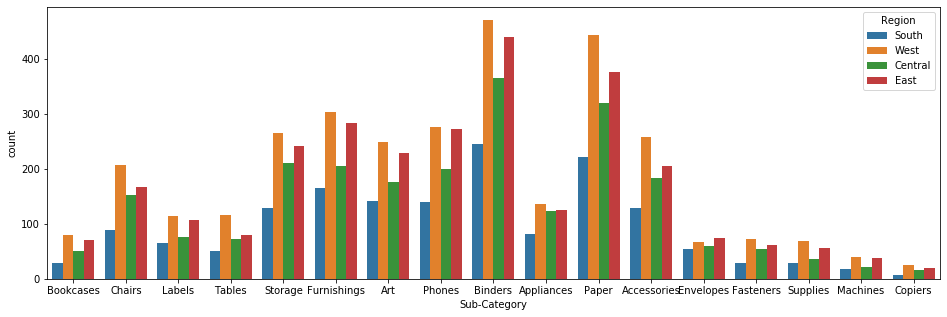

In [49]:
plt.figure(figsize=(16,5))
sns.countplot(store_data["Sub-Category"], hue= store_data["Region"])

<b>
    <ol>
        <li><u>Products which are sold maximum in numbers</u>: Binders and Paper </li><br>
        <li><u>Average sold product</u>: Chairs, Storage, Furnishings items, art, phone and Accessories </li><br>
        <li><u>least sold product</u>: Machines and Copiers</li><br>
        <li>Region wise maximum sale is from Western US</li><br>
    </ol>
</b>

### <u>Analysing products sale Segment wise </u>

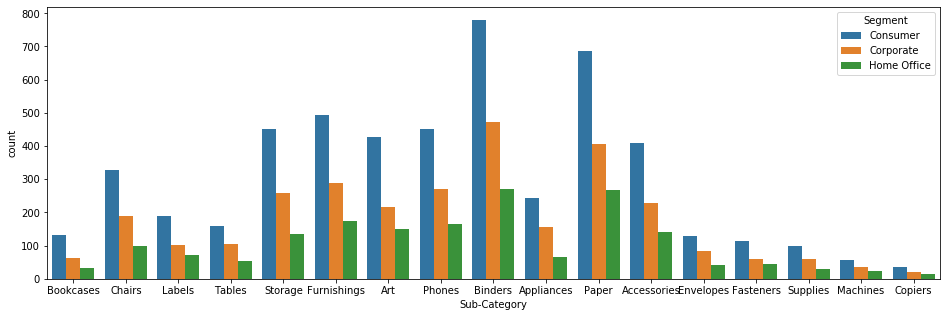

In [50]:
plt.figure(figsize=(16,5))
sns.countplot(store_data["Sub-Category"], hue= store_data["Segment"] )

<b>
    <ol>
        <li><u>Major product purchased by consumer are</u>: Binder,Paper,Accerrories,Phone,Art,Furnidhings and Storage  </li><br>
        <li><u> Major product purchased by consumer are</u>: Binder,Paper,Accerrories,Phone,Furnidhings and Storage</li><br>
        <li><u>Major product purchased by consumer are</u>: binder and paper</li><br>
    </ol>
</b>

### <u>Analysing products sale Category wise </u>

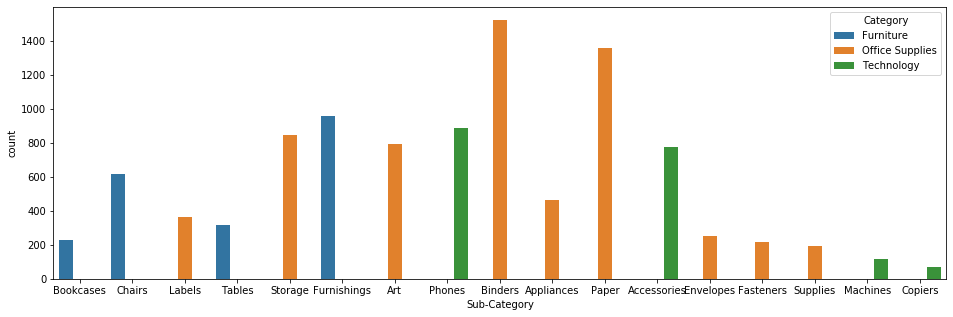

In [51]:
plt.figure(figsize=(16,5))
sns.countplot(store_data["Sub-Category"], hue= store_data["Category"] )

<b>
    <li> Maximum item are their in office Supplies Category </li>
    <li> In technolgy and Furniture category only 4 items are sold individualy from this store.</li>

### <u>Finding correlation b/w various columns

Correlation Table


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


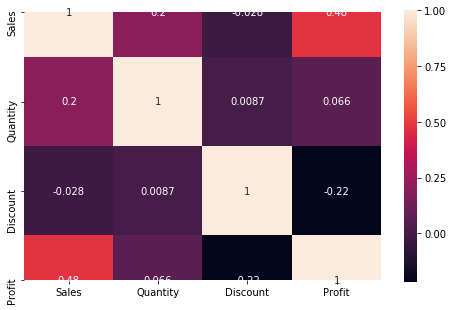

In [52]:
plt.figure(figsize=(8,5))
k=sns.heatmap(store_data.corr(), annot=True, cmap="rocket", robust=True, square=True)
print("Correlation Table")
store_data.corr()

<b>
    <li> Profit and Discount have negative correlation. i.e. on increasing discount %profit decreases</li><br>
    <li> Profite is directly proportion to sales </li> <br>
</b>

### <u>Visualizing distribution of Numerical columns

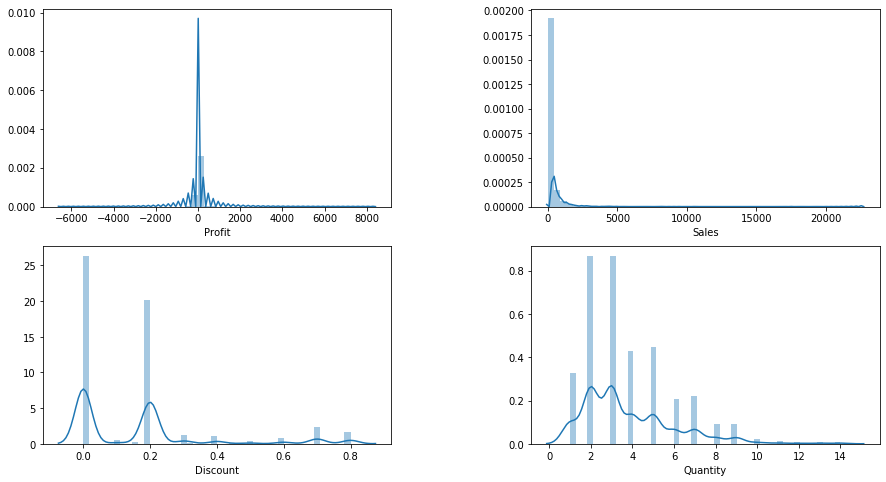

In [53]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.subplots_adjust(wspace=0.4)
sns.distplot(store_data['Profit'], ax=axis[0][0])
sns.distplot(store_data['Sales'] , ax=axis[0][1])
sns.distplot(store_data['Discount'] , ax=axis[1][0])
sns.distplot(store_data['Quantity'] , ax=axis[1][1])

<b>Horizontal spread of various numerical column</b>
<b>
    <li> Average Sales : 230</li>
    <li> Average Profit : 29</li>
    <li> Average Discount : 0.16</li>
 </b>

### <u>Visualizing via Pieplot:</u>

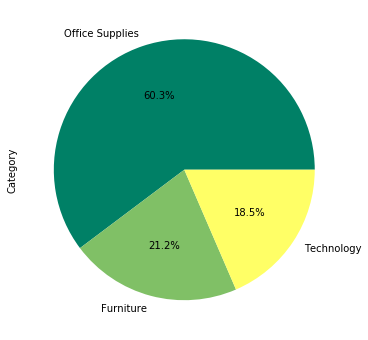

In [54]:
plt.figure(figsize=(6,6))
store_data['Category'].value_counts().plot.pie(autopct='%1.1f%%', cmap="summer")
plt.show()

#### Percentage distribution of Categorical goods in the store.

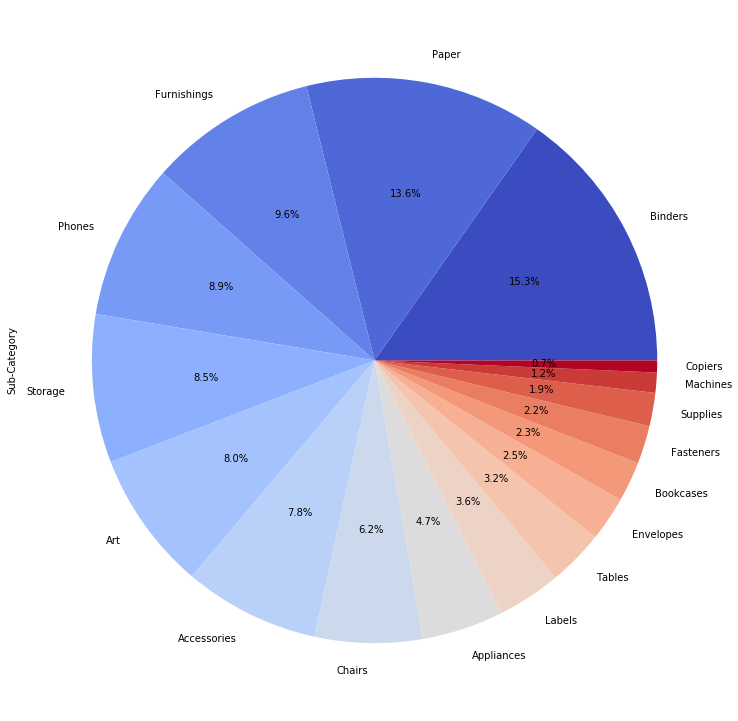

In [55]:
plt.figure(figsize=(13,13))
store_data['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%', cmap="coolwarm")
plt.show()

#### Percentage distribution of Sub-Categorical goods in the store.

### <u>State-wise Sales distribution

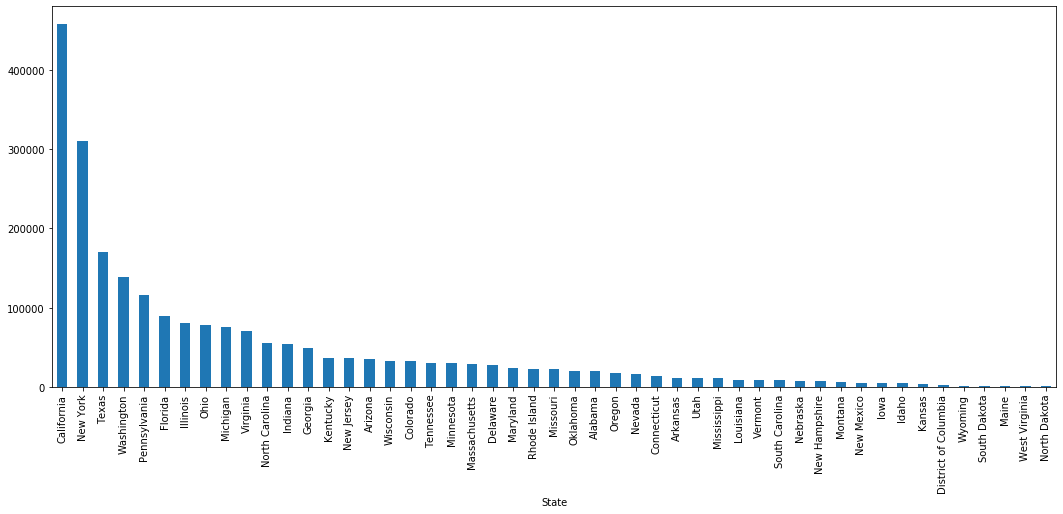

In [56]:
sale_dist=store_data.groupby(['State'])['Sales'].sum().nlargest(50)
sale_dist.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(18,7))
sale_dist.plot.bar()

#### California and New York are the state with maximum Sales

### <u> State-wise Profit Distribution

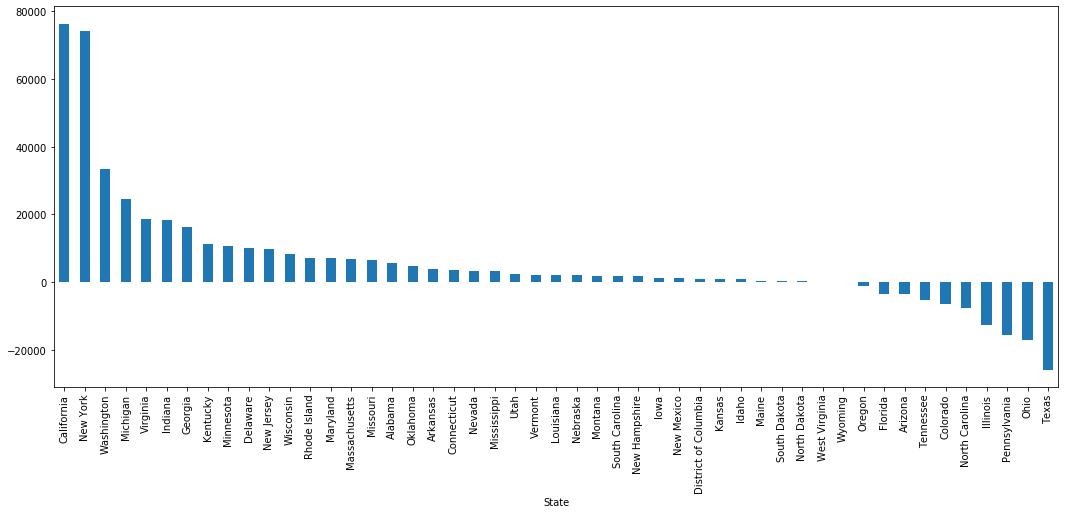

In [57]:
profit_dist=store_data.groupby(['State'])['Profit'].sum().nlargest(50)
profit_dist.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(18,7))
profit_dist.plot.bar()

### <u> Sub-Category vs Sales Distribution

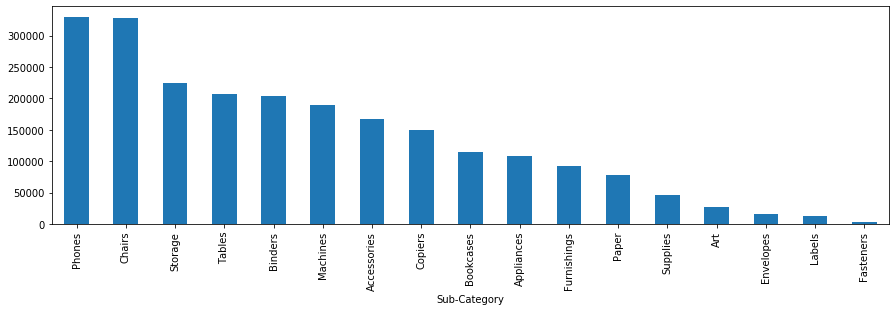

In [58]:
profit_dist=store_data.groupby(['Sub-Category'])['Sales'].sum()
profit_dist.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(15,4))
profit_dist.plot.bar()

###  <u> Sub-Category vs Discount Distribution

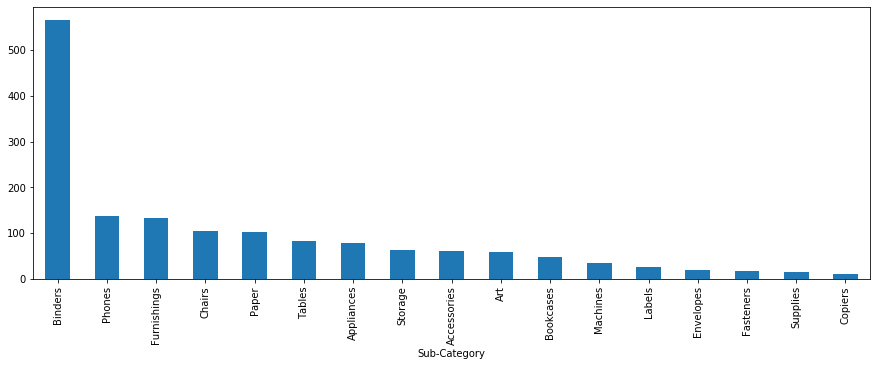

In [59]:
profit_dist=store_data.groupby(['Sub-Category'])['Discount'].sum()
profit_dist.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(15,5))
profit_dist.plot.bar()

### <u> Sub-Category vs Profit Distribution

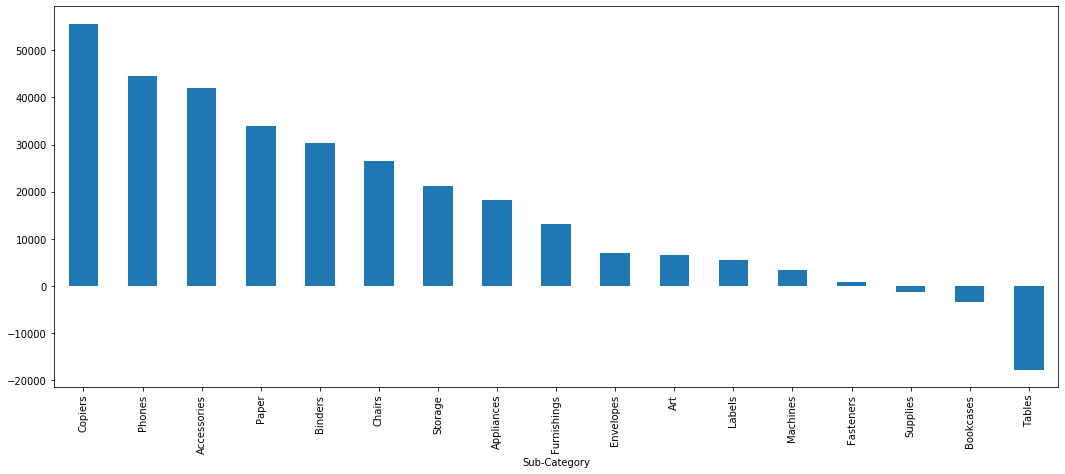

In [60]:
profit_dist=store_data.groupby(['Sub-Category'])['Profit'].sum()
profit_dist.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(18,7))
profit_dist.plot.bar()

### <u>Conclusion

<b>
    <ol>
        <li>California and New York are the state with maximum Sales.</li><br>
        <li>California and New York are the most profitable State.</li><br>
        <li>Texas, Chio, Pennsylvania, Illinois and North Carolina are the state of mazor concern as Store is under loss because of sales in these states.</li><br>
        <li>Sales in Texas must be minimized because it generate huge loss.</li><br>
        <li>Sales of binder is average therefore discount of binder should be reduced.</li><br>
        <li>Store should stop selling Tables and Bookcases as these products are not generating any profit.</li><br>
        <li>Store should be promoting Copiers more as less people are buying it currently but the profit on it is highest compared to other goods.
  </ol>
</b>